In [ ]:
import matplotlib.pyplot as plt
from numpy import absolute
from numpy import mean
from numpy import std
import glob
import os
import re
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/MyDrive/Thesis/Plots')
myfiles = glob.glob('*.txt')
# print(myfiles)
print(len(myfiles))

Mounted at /content/gdrive
5801


In [ ]:
list = []
x = []

for ele in myfiles:
    # file = open(ele)
    # content = file.readlines()

    f = open(ele,'r')
    
    # list.append(f)
    for i in f:
        # list.append(i)
        list.append(i)
        # print(i)
    temp = []
    fileName = ele.split('_')
    for i in range(0,6):
      temp.append(float(fileName[i]))

    x.append(temp)
    
# print(list[0])

y = []

for i in list:
  # row = re.split("\\s+", list[j])
  list_ele = re.split("\\s+", i)
  temp = []
  for j in range(100,200):
    temp.append(float(list_ele[j]))
  # print(list_ele)
  y.append(temp)


x = np.array(x)
y = np.array(y)

x = x/25


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

# TO GET SOME DATAPONTS UNSEEN BY MODEL
x = x_val[:116]
y = y_val[:116]

x_val = x_val[116:]
y_val = y_val[116:]

In [ ]:
len(x_val)

465

In [ ]:
axs = []
for i in range(1,101):
  axs.append(i)

# Linear Regression

In [ ]:
model1 = LinearRegression()
model1.fit(x_train, y_train)

y_pred_LR = model1.predict(x)

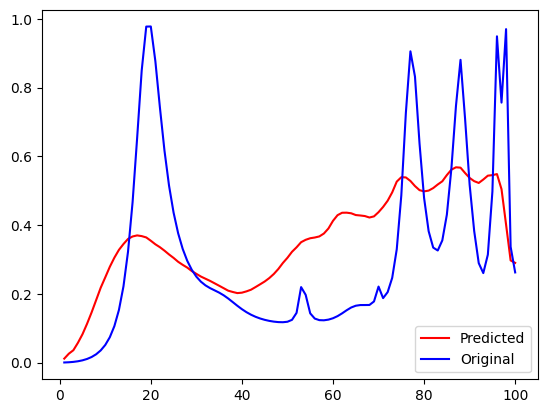

In [ ]:
plt.plot(axs,y_pred_LR[0],'r', label="Predicted")
plt.plot(axs,y[0],'b', label="Original")
plt.legend()
plt.show()

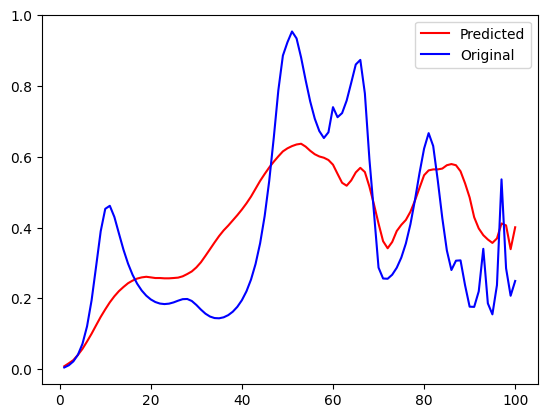

In [ ]:
plt.plot(axs,y_pred_LR[105],'r', label="Predicted")
plt.plot(axs,y[105],'b', label="Original")
plt.legend()
plt.show()

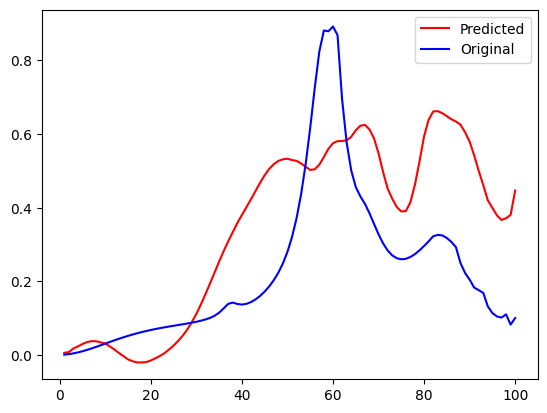

In [ ]:
plt.plot(axs,y_pred_LR[107],'r', label="Predicted")
plt.plot(axs,y[107],'b', label="Original")
plt.legend()
plt.show()

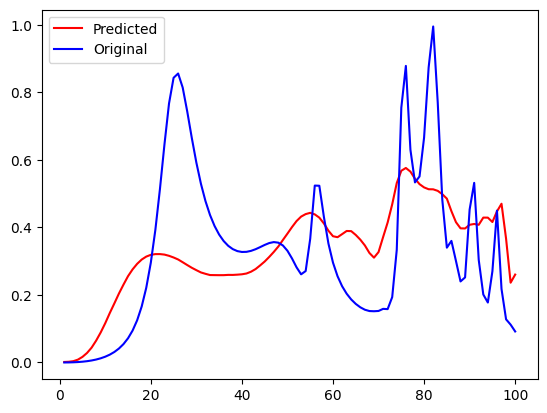

In [ ]:
plt.plot(axs,y_pred_LR[112],'r', label="Predicted")
plt.plot(axs,y[112],'b', label="Original")
plt.legend()
plt.show()

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model1, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 0.140 (0.001)


In [ ]:
ypred1 = model1.predict(x_test)
mse = mean_squared_error(y_test, ypred1)
print("mean-squared-error: ",mse)

mean-squared-error:  0.035197173845240126


# KNN

In [ ]:
model2 = KNeighborsRegressor()
model2.fit(x_train, y_train)

y_pred_KNN = model2.predict(x)

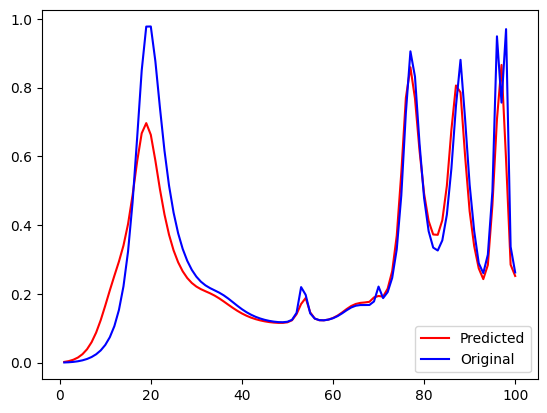

In [ ]:
plt.plot(axs,y_pred_KNN[0],'r', label="Predicted")
plt.plot(axs,y[0],'b', label="Original")
plt.legend()
plt.show()

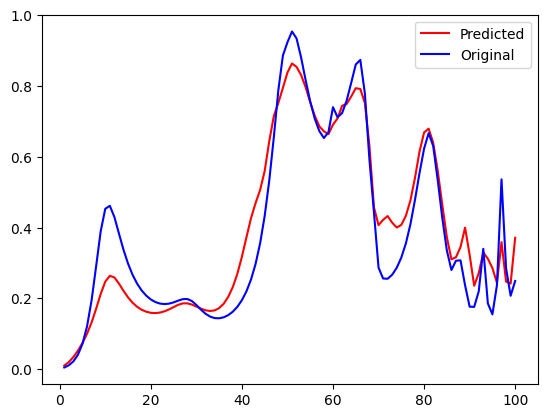

In [ ]:
plt.plot(axs,y_pred_KNN[105],'r', label="Predicted")
plt.plot(axs,y[105],'b', label="Original")
plt.legend()
plt.show()

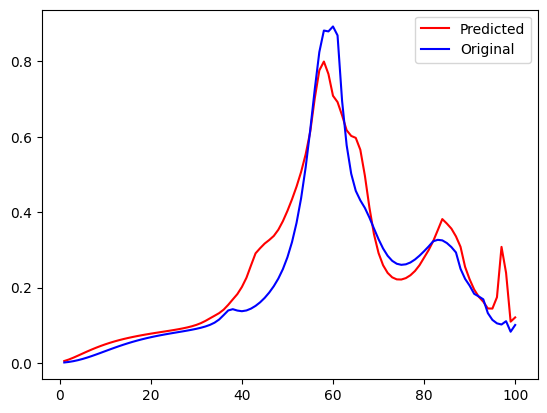

In [ ]:
plt.plot(axs,y_pred_KNN[107],'r', label="Predicted")
plt.plot(axs,y[107],'b', label="Original")
plt.legend()
plt.show()

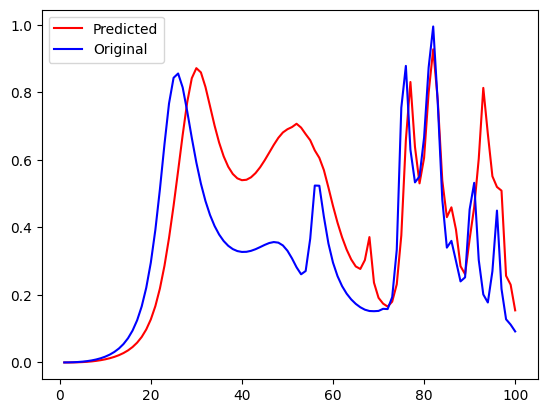

In [ ]:
plt.plot(axs,y_pred_KNN[112],'r', label="Predicted")
plt.plot(axs,y[112],'b', label="Original")
plt.legend()
plt.show()

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model2, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 0.069 (0.001)


In [ ]:
ypred2 = model2.predict(x_test)
mse = mean_squared_error(y_test, ypred2)
print("mean-squared-error: ",mse)

mean-squared-error:  0.011261272917957678


# Decision Tree

In [ ]:
model3 = DecisionTreeRegressor()
model3.fit(x_train, y_train)

y_pred_DT = model3.predict(x)

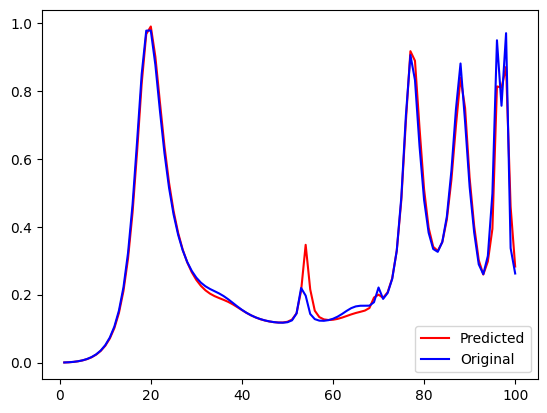

In [ ]:
plt.plot(axs,y_pred_DT[0],'r', label="Predicted")
plt.plot(axs,y[0],'b', label="Original")
plt.legend()
plt.show()

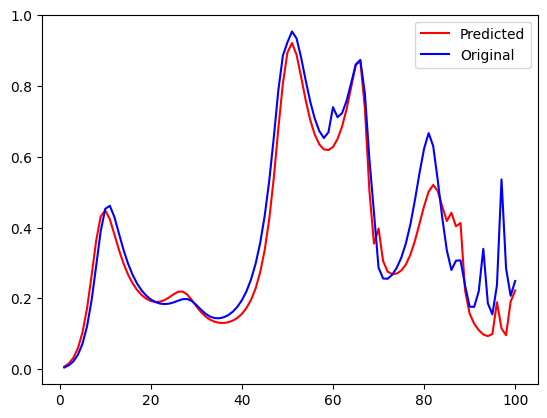

In [ ]:
plt.plot(axs,y_pred_DT[105],'r', label="Predicted")
plt.plot(axs,y[105],'b', label="Original")
plt.legend()
plt.show()

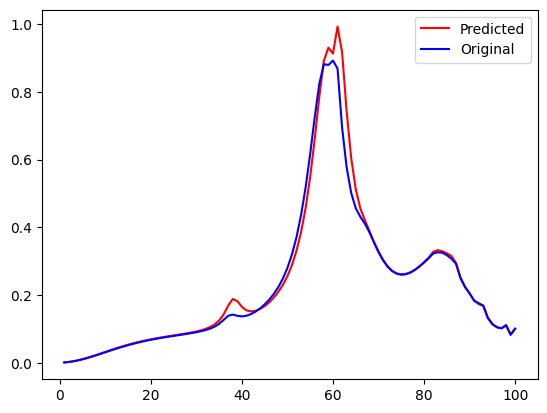

In [ ]:
plt.plot(axs,y_pred_DT[107],'r', label="Predicted")
plt.plot(axs,y[107],'b', label="Original")
plt.legend()
plt.show()

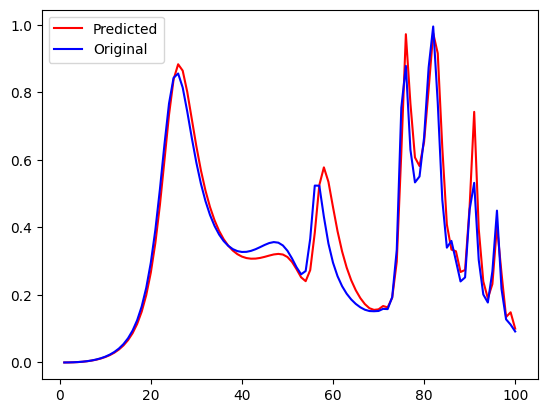

In [ ]:
plt.plot(axs,y_pred_DT[112],'r', label="Predicted")
plt.plot(axs,y[112],'b', label="Original")
plt.legend()
plt.show()

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model3, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 0.057 (0.001)


In [ ]:
ypred3 = model3.predict(x_test)
mse = mean_squared_error(y_test, ypred3)
print("mean-squared-error: ",mse)

mean-squared-error:  0.009272688525210121
